## Support Vector Machines

   1) Lets start by importing the libraries required in the implementation
  
   2) Loading Dataset from sklearn.datasets
   
   3) Manupilating Values of class 0 as -1
   
   4) Making plots for better visualization
   
   5) Writing own svm class 
  
   6) Testing on the dataset the hyper plane we got and visualizing it for better understanding

In [12]:
from sklearn.datasets import make_classification   #Importing The Data
import matplotlib.pyplot  as plt    #Importing to make plots and visualize the data
import numpy as np    #Imprting for creating arrays ,doing  vectorization and performing dot products

In [13]:
X,Y=make_classification(n_classes=2,n_samples=400,n_features=2,n_clusters_per_class=1,random_state=3,n_informative=2,n_redundant=0)
##For better understanding we took only two classes with two features to make easy visualization and cluster per class only 1 so that 
##there will be less intersection between the classes and 0 redundant samples

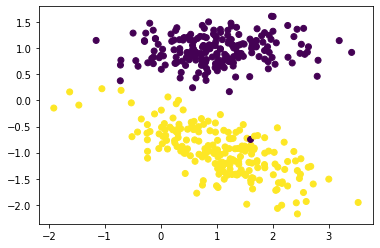

In [14]:
Y[Y==0]=-1 ##Will make all the values of class 0 as -1
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [15]:
Y # Checking that was it succesfull

array([-1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,
       -1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1,
       -1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1, -1,
       -1, -1, -1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1,
        1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,
       -1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
       -1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1,
        1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1,
       -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1, -1,
        1, -1,  1, -1, -1

In [16]:
class SVM:
    def __init__(self,C=1.0):
        self.C=C    #Penalty Factor DEcided by the user while creating the model default value will be 1
        self.W=0    #Weights for the model initialy value is taken any random we took 0
        self.b=0    #Bias for the model initialy value is taken random we took 0
    def HingeLoss(self,W,b,X,Y):
        loss=0.0
        loss+=0.5*np.dot(W,W.T) #Squared loss to minimize 
        
        m=X.shape[0]
        
        for i in range(m):
            ti=Y[i]*(np.dot(W,X[i].T)+b)
            loss+=self.C*max(0,1-ti) #adding the error made by the sample point 
            
        return loss[0][0]
    def Fit(self,X,Y,LearningRate=0.001,BatchSize=100,MaxIteration=300):
        no_of_features=X.shape[1]
        no_of_samples=X.shape[0]
        
        n=LearningRate
        c=self.C
        W=np.zeros((1,no_of_features))
        bias=0
        print(self.HingeLoss(W,bias,X,Y))
        
        losses=[]
        
        for i in range(MaxIteration):
            l=self.HingeLoss(W,bias,X,Y)
            losses.append(l)
            ids=np.arange(no_of_samples)
            np.random.shuffle(ids)   #Radom suffling is used as it was mentioned in the Pegasos
            for batch_start in range(0,no_of_samples,BatchSize):
                gradw=0
                gradb=0
                for j in range(batch_start,batch_start+BatchSize):
                    if j<no_of_samples:
                        i=ids[j]
                        ti=Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>=1:
                            gradw+=0
                            gradb+=0
                        else:
                            gradw+=c*Y[i]*X[i]
                            gradb+=c*Y[i]
                W=W-n*W+n*gradw
                bias=bias+n*gradb
        self.W=W
        self.b=bias
        return W,bias,losses
                
                    
        

In [17]:
model=SVM()
W,b,Losses=model.Fit(X,Y) #The value printed is the initial loss which is very high

400.0


In [18]:
Losses #As u can see the loss has drastically reduced over epochs suggesting that the implementation is done in correct way

[400.0,
 250.8262614508242,
 120.08224642136427,
 69.65139179854894,
 52.76345781466666,
 44.65630252891286,
 39.46292216860934,
 35.67707718088922,
 32.750061580122185,
 30.47417845694759,
 28.717060895801247,
 27.2352937302207,
 25.951652513522777,
 24.827610437044296,
 23.806734396466762,
 23.004691618422733,
 22.296597155555194,
 21.79017894284382,
 21.340104880031006,
 20.965461360696786,
 20.61706931597494,
 20.300821597271383,
 20.040408448207845,
 19.804050011461904,
 19.59080639831994,
 19.37529309895176,
 19.16062685505908,
 18.946735266021168,
 18.752418798754395,
 18.586273621404352,
 18.426011086044113,
 18.269249788641368,
 18.12941710188153,
 18.007901916474705,
 17.88512886592729,
 17.763390333064947,
 17.642135932422025,
 17.522171332947448,
 17.40277418919409,
 17.29889608551457,
 17.21057260192864,
 17.12267382840638,
 17.0427305173135,
 16.97663144864612,
 16.91081520952745,
 16.845925585993804,
 16.786334335624577,
 16.722905768452154,
 16.663744168639322,
 16.6084

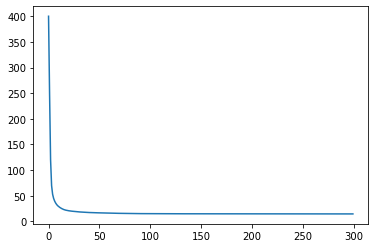

In [19]:
plt.plot(Losses)

In [20]:
def PlotHyperPlane(w1,w2,b):
    plt.figure(figsize=(12,12))
    plt.scatter(X[:,0],X[:,1],c=Y)
    x1=np.linspace(-2,4,10)
    x2=-1*(w1*x1+b)/w2
    plt.plot(x1,x2)
    plt.show()
    
    

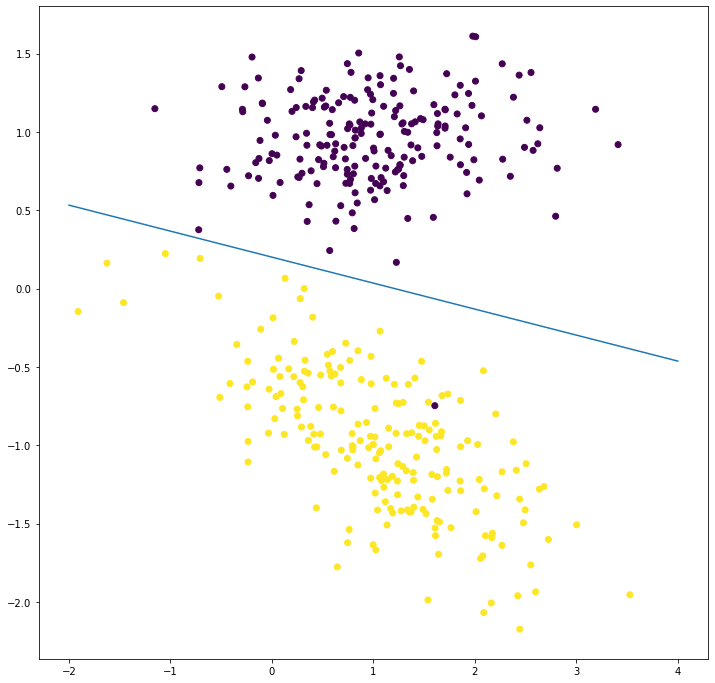

In [21]:
PlotHyperPlane(W[0][0],W[0][1],b) #Hyper Plane plotted which can Do classification their might be some outliers but as we know error didnt reduce to 
#zero hence these outliers are allowed maybe changing hyper parameters might get better results